# Part 1. READ "match_trt" and "match_con"

In [1]:
import pandas as pd
import numpy as np

## READ "match_trt" and "match_con"
df_trt = pd.read_csv('./Test_data/src_data/match_trt_df.csv')
df_con = pd.read_csv('./Test_data/src_data/match_con_df.csv')
print( df_trt.shape, df_con.shape)

# examples
df_trt.head(2)

(6826, 26) (5132, 26)


,paper_url,arxiv_id,title,abstract,url_abs,url_pdf,proceeding,authors,tasks,date,...,doi,venue_raw,venue_id,venue_type,authors_name,authors_id,authors_org,fos_name,fos_w,ref
0,https://paperswithcode.com/paper/large-scale-p...,1706.03736,large-scale plant classification with deep neu...,This paper discusses the potential of applying...,http://arxiv.org/abs/1706.03736v1,http://arxiv.org/pdf/1706.03736v1.pdf,NaN,['Ignacio Heredia'],[],2017-06-12,...,10.1145/3075564.3075590,Computing Frontiers,2.626327e+09,C,['Ignacio Heredia'],[2622430314],"['Instituto de Fisica de Cantabria (CSIC-UC), ...","['Fork (system call)', 'Data mining', 'Compute...","[Decimal('0.4434'), Decimal('0.45259'), Decima...","[1522301498, 1556850077, 1606347560, 191666523..."
1,https://paperswithcode.com/paper/deep-boltzman...,1509.06535,deep boltzmann machines in estimation of distr...,Estimation of Distribution Algorithms (EDAs) r...,http://arxiv.org/abs/1509.06535v2,http://arxiv.org/pdf/1509.06535v2.pdf,NaN,"['Malte Probst', 'Franz Rothlauf']",['Combinatorial Optimization'],2015-09-22,...,NaN,Neural and Evolutionary Computing,2.596710e+09,J,"['Malte Probst', 'Franz Rothlauf']","[2137666597, 2171731261]",[],"['Convergence (routing)', 'Estimation of distr...","[Decimal('0.48188'), Decimal('0.60781'), Decim...","[157468466, 189596042, 1536712125, 1597878669,..."


In [2]:
## Assign "group" variable for Treated/control index 
df_trt['group']= 1
df_con['group']= 0

## Stack both trt and control data as "df_all"
df_all = pd.concat([df_trt, df_con], axis = 0, ignore_index=True)
df_all.shape

(11958, 27)

In [3]:
## create "year" value
df_all['year'] = df_all['date'].str[:4].astype(int)
df_all.groupby(['group', 'year']).size()

group  year
0      1995       1
       1997       2
       1998       1
       1999       1
       2000       1
       2002       3
       2003       2
       2006       2
       2007       1
       2008       4
       2009       3
       2010       8
       2011      17
       2012      35
       2013      47
       2014     109
       2015     253
       2016     516
       2017    1077
       2018    1937
       2019    1111
       2020       1
1      2012       4
       2013      23
       2014      69
       2015     267
       2016     716
       2017    1410
       2018    2574
       2019    1741
       2020      22
dtype: int64

Based on above published-year distributions, I study the year-range during the **2016-2018** period based on two reasons below: 
- 1) starting from 2016, there were more papers that mentioned codes in our sample data; 
- 2) the number of citations are also sensitive to the publish years. For instance, those papers published in 2019 might need more time to validate their acedamic influences in terms of citations. 

In [4]:
## 2016-2018 period -- DT
DT = df_all.loc[ (df_all['year'] >= 2016) & (df_all['year'] <= 2018), :]
print( DT.shape )
DT.groupby(['group', 'year']).size()

(8230, 28)


group  year
0      2016     516
       2017    1077
       2018    1937
1      2016     716
       2017    1410
       2018    2574
dtype: int64

**To Dos:**
- describe variables ??

# Part 2. Feature Extraction_simple
**Dependent Variable (DV)**
- n_citation: number of citation

**MAIN IV**
- group: whether the paper mentions code in paper?

**CREATE Basic features**
- 1) title_len: title length
- 2) abs_len: abstract length


- 3) no_author: number of authors
- 4) no_affi:   number of affiliations --> too much unknown (drop this variable)
- 5) no_ref:    number of references given by the dblp data

In [5]:
print( DT.keys() )
DT.head(1)

Index(['paper_url', 'arxiv_id', 'title', 'abstract', 'url_abs', 'url_pdf',
       'proceeding', 'authors', 'tasks', 'date', 'id', 'n_citation',
       'doc_type', 'publisher', 'volume', 'issue', 'doi', 'venue_raw',
       'venue_id', 'venue_type', 'authors_name', 'authors_id', 'authors_org',
       'fos_name', 'fos_w', 'ref', 'group', 'year'],
      dtype='object')


,paper_url,arxiv_id,title,abstract,url_abs,url_pdf,proceeding,authors,tasks,date,...,venue_id,venue_type,authors_name,authors_id,authors_org,fos_name,fos_w,ref,group,year
0,https://paperswithcode.com/paper/large-scale-p...,1706.04,large-scale plant classification with deep neu...,This paper discusses the potential of applying...,http://arxiv.org/abs/1706.03736v1,http://arxiv.org/pdf/1706.03736v1.pdf,NaN,['Ignacio Heredia'],[],2017-06-12,...,2.626327e+09,C,['Ignacio Heredia'],[2622430314],"['Instituto de Fisica de Cantabria (CSIC-UC), ...","['Fork (system call)', 'Data mining', 'Compute...","[Decimal('0.4434'), Decimal('0.45259'), Decima...","[1522301498, 1556850077, 1606347560, 191666523...",1,2017


In [6]:
DT = DT.fillna('NA')

# 1) title_len: title length
DT.loc[:, 'title_len'] = DT['title'].apply(lambda x: len(x.strip().split()) )

# 2) abs_len: abstract length  --- ????
def get_abslen(x):
    if x == 'NA':
        return 'NA'
    else:
        return len( x.strip().split() ) 
DT.loc[:, 'abs_len'] = DT['abstract'].apply(lambda x: get_abslen(x) )
print( '\n', 'The number of unknown abstracts: {}, \n \
      so I remove those samples with unknown abstracts info'.format( 
           sum(DT['abs_len'] == 'NA'))  ) 
DT = DT.loc[DT['abs_len'] != 'NA', :]

# 3) no_author: number of authors
DT.loc[:, 'no_author'] = DT['authors_name'].apply(lambda x: len(x) )

# 4) no_affi: number of affiliations
print( '\n', 'The percentage of unknown authors_affilations: {}%, \n \
      so I drop this feature'.format( 
           round( sum( DT['authors_org'] == '[]' )/DT.shape[0] * 100), 2)) 

# 5) no_ref: number of references given by the dblp data
DT.loc[:, 'no_ref'] = DT['ref'].apply(lambda x: len(x) )


 The number of unknown abstracts: 140, 
       so I remove those samples with unknown abstracts info

 The percentage of unknown authors_affilations: 77%, 
       so I drop this feature


In [7]:
## get "DT_base" : DT with Basic features
DT_base = DT[['n_citation', 'group', 'title_len', 'abs_len', 'no_author',
             'no_ref']]
print(DT_base.shape)
DT_base.head()

(8090, 6)


,n_citation,group,title_len,abs_len,no_author,no_ref
0,1,1,7,95,19,168
2,0,1,11,104,95,264
5,9,1,7,201,33,405
6,6,1,9,226,52,143
7,2,1,7,94,16,155


In [162]:
### SAVE DT_base
DT_base.to_csv('./Test_data/src_data/DT_base.csv', index=False)


# Part 3. Feature Extraction_LDA
- 6) unsupervised Topic Modeling using abstract data?

In [9]:
import os
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenj107\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
!pip install pyldavis 
!pip install spacy
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-cp37-none-any.whl size=108255 sha256=911d845a46ffb39334b1036731b401ca7e24801eed0c60e3acc19da0bdd42e37
  Stored in directory: C:\Users\chenj107\AppData\Local\pip\Cache\wheels\ce\2e\f2\edb1bbf046cfa865406b6d62f56bb9ae9052fa53b29648fb39
Successfully built smart-open
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [17]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re

import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Preprocessing**

In [19]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])  ## --> put all reviews into a very long str
    all_words = all_words.split()

    ## "FreqDist()" built-in function
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 30 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [34]:
## remove unwanted characters, numbers and symbols
DT['abstract_clean'] = DT['abstract'].str.replace("[^a-zA-Z#]", " ")

## remove the stopwords and short words (<2 letters) from the abstract
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# remove short words (length < 3)
DT['abstract_clean'] = DT['abstract_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
abstract = [remove_stopwords(r.split()) for r in DT['abstract_clean'] ]

# make entire text lowercase
abstract = [r.lower() for r in abstract]

Let’s again plot the most frequent words and see if the more significant words have come out.

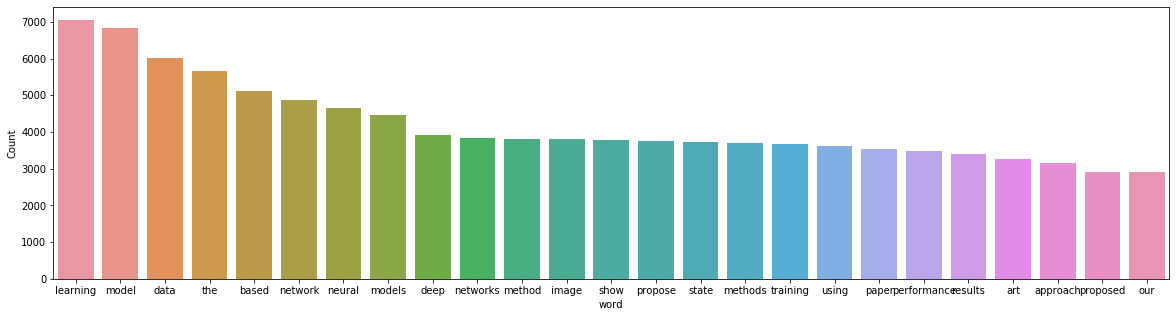

In [35]:
freq_words(abstract, 25)

**Building an LDA model**

In [36]:
abstract = pd.Series(abstract).apply(lambda x: x.split())

## creating the Term Dictionary of our corpus, 
#       where every unique term is assigned an inde
dictionary = corpora.Dictionary(abstract)

## convert the list of abstract into a Document Term Matrix
doc_term_matrix = [dictionary.doc2bow(rev) for rev in abstract]

print("the total number of abstracts: ", len(doc_term_matrix), "\n")
# abstract[5], doc_term_matrix[5]

the total number of abstracts:  8090 



In [39]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model -- with TWO topics
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=2, random_state=100,
                chunksize=1000, passes=50)

Let’s print out the topics that our LDA model has learned.

In [40]:
lda_model.print_topics()

[(0,
  '0.009*"model" + 0.008*"image" + 0.007*"the" + 0.007*"based" + 0.007*"network" + 0.006*"neural" + 0.006*"data" + 0.006*"images" + 0.005*"state" + 0.005*"art"'),
 (1,
  '0.014*"learning" + 0.009*"data" + 0.007*"model" + 0.006*"the" + 0.006*"networks" + 0.006*"deep" + 0.005*"training" + 0.005*"algorithm" + 0.005*"show" + 0.005*"models"')]

In [52]:
## get the document-topic
tt = []
for rev in abstract:
    bow = dictionary.doc2bow(rev)
    pred_topic = lda_model.get_document_topics(bow)
    if pred_topic[0][1] >= 0.5: 
        tt.append( 0 ) ## topic 0
    else:
        tt.append( 1 ) ## topic 1

In [60]:
DT['abstract_topic'] = tt
DT_cplx = DT[['abstract', 'abstract_topic']]
print(DT_cplx.shape)
DT_cplx.head(2)

(8090, 2)


,abstract,abstract_topic
0,This paper discusses the potential of applying deep learning techniques for\nplant classification and its usage for citizen science in large-scale\nbiodiversity monitoring. We show that plant clas...,0
2,This paper presents an approach combining lexico-semantic resources and\ndistributed representations of words applied to the evaluation in machine\ntranslation (MT). This study is made through the...,0


In [61]:
### SAVE DT_cplx
DT_cplx.to_csv('./Test_data/src_data/DT_cplx.csv', index=False)